- Chapter 13: Succession Matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def tree_population(years, initialbeech, initialmaples, initialothers):
    #Set explanation of parameters
    """
    Parameters:
    years (int): Number of years to simulate
    initial_first_year (int): Initial population of first year beetles
    initial_second_year (int): Initial population of second year beetles
    Returns:
    initial_first_year (list): Population of first year beetles for each year
    initial_second_year (list): Population of second year beetles for each year
    initial_third_year (list): Population of third year beetles for each year
    total_population (list): Total population for each year
    """
    # Create an assignment matrix
    A = np.array([[0.8, 0.25, 0.1], [0.1, 0.15, 0.25], [0.1, 0.6, 0.65]])
    n_t = np.array([initialbeech, initialmaples, initialothers], dtype=float)
    
    initial_population_vector = np.array([initialbeech, initialmaples, initialothers], dtype=float)
    #Create list to store population values
    initialbeech = []
    initialmaples = []
    initialothers = []
    

    initialbeech.append(n_t[0])
    initialmaples.append(n_t[1])
    initialothers.append(n_t[2])
    
    #Loop through the years to calculate population for each year
    n_t = initial_population_vector
    for year in range(1, years):
        n_t = np.dot(A, n_t)
        #Append current population to lists
        initialbeech.append(n_t[0])
        initialmaples.append(n_t[1])
        initialothers.append(n_t[2])
        #Return population values


    return (initialbeech, initialmaples, initialothers)

In [26]:
#Call the function with 50 years, 500 initial first year beetles, and 500 initial second year beetles
beech, maples, others = tree_population(100, 1, 20, 79)

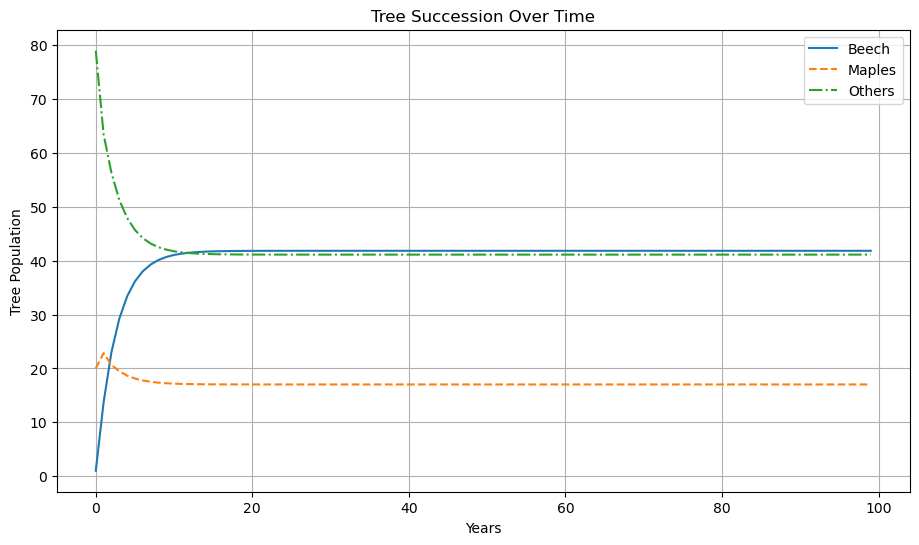

In [35]:
# plot populations for each age class and total
# ensure `years` matches the length of the population vectors
years = list(range(len(total_pop)))
plt.figure(figsize=(11, 6))
plt.plot(years, beech, label='Beech', linestyle='-')
plt.plot(years, maples, label='Maples', linestyle='--')
plt.plot(years, others, label='Others', linestyle='-.')
# make sure later code that references `result` doesn't error
plt.xlabel('Years')
plt.ylabel('Tree Population')
plt.title('Tree Succession Over Time')
plt.legend()
plt.grid()
plt.show()

- Chapter 14 

In [43]:
# Create an algorithm that calculates the population of four age classes of a beetle population over N years
# The initial populations are provided as arguments A, B, C, D
# The matrix below encodes survival and reproduction probabilities.

# Create a definition to calculate and return the population of each age group for each year
def butterfly_population(years, A, B, C, D):
    #Set explanation of parameters
    """
    Parameters:
    years (int): Number of years to simulate
    A, B, C, D (int or float): Initial populations for the four age classes
    Returns:
    A1 (list): Population of age class A for each year
    B2 (list): Population of age class B for each year
    C3 (list): Population of age class C for each year
    D4 (list): Population of age class D for each year
    """
    # Create an assignment matrix (4x4) using given probabilities
    Ea = 0.03
    Eb = 0.13
    Ca = 0.02
    Cb = 0.02

    M = np.array([
        [1, Ea*(1-Cb),(1-Ca)*Eb,Ea*Eb],
        [0,(1-Ea)*(1-Cb),Ca*Eb,(1-Ea)*Eb],
        [0,Ea*Cb,(1-Ca)*(1-Eb),Ea*(1-Eb)],
        [0,(1-Ea)*Cb,Ca*(1-Eb),(1-Ea)*(1-Eb)]
    ])

    # initial population vector (do not overwrite input names)
    n_t = np.array([A, B, C, D], dtype=float)

    # Create lists to store population values for each class (use distinct names)
    A1 = []
    B2 = []
    C3 = []
    D4 = []

    # Append initial populations
    A1.append(n_t[0])
    B2.append(n_t[1])
    C3.append(n_t[2])
    D4.append(n_t[3])

    # Loop through the years to calculate population for each year
    for year in range(1, years):
        n_t = M.dot(n_t)
        # Append current population to lists
        A1.append(n_t[0])
        B2.append(n_t[1])
        C3.append(n_t[2])
        D4.append(n_t[3])

    # Return the time series for each age class
    return (A1, B2, C3, D4)


In [46]:
A1, B2, C3, D4 = butterfly_population(100, 500, 500, 500, 500)

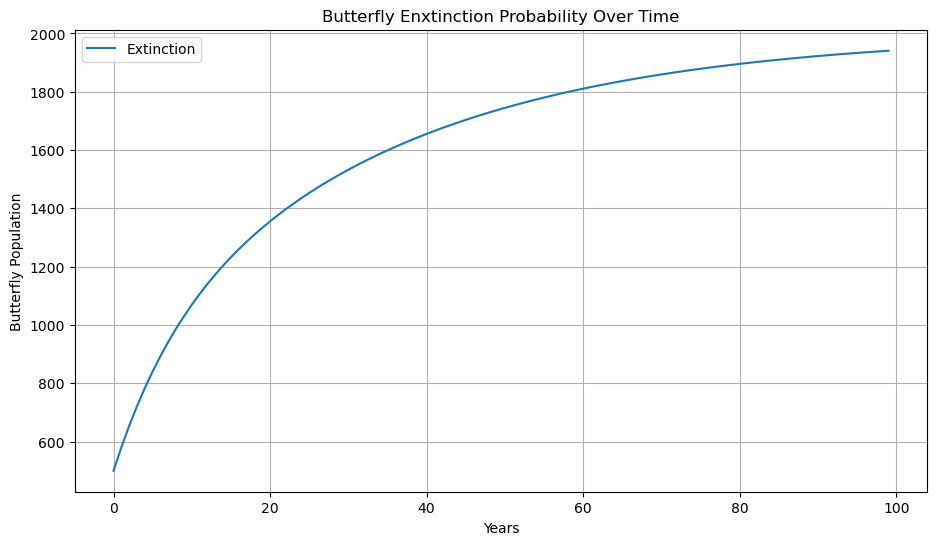

In [47]:
# plot populations for each age class and total
# ensure `years` matches the length of the population vectors
years = list(range(len(total_pop)))
plt.figure(figsize=(11, 6))
plt.plot(years, A1, label='Extinction', linestyle='-')
# make sure later code that references `result` doesn't error
plt.xlabel('Years')
plt.ylabel('Butterfly Population')
plt.title('Butterfly Enxtinction Probability Over Time')
plt.legend()
plt.grid()
plt.show()